 Description: Sentence similarity using Sentence Transformers

In [1]:
# Import libraries
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

/Users/james/miniconda3/envs/NN_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define test sentences
reference_sentence = "This is an example sentence"
test_sentences = [
    "This is an example sentence",
    "This is another example sentence",
    "This is a sentence",
    "This is a sentence with a different meaning",
    "This is a sentence with a different meaning and a different length",
    "This is some other sentence",
]

len(test_sentences)

6

In [3]:
# Load pre-trained model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [4]:
# Compute embedding for all sentences
sentence_similarity_df_list = []
for reference, test in list(product([reference_sentence], test_sentences)):
    reference_embedding = model.encode(reference, convert_to_tensor=True)
    test_embedding = model.encode(test, convert_to_tensor=True)
    sentence_similarity_df_list.append(
        pd.DataFrame(
            {
                "reference_sentence": reference,
                "test_sentence": test,
                "sentence_similarity": util.pytorch_cos_sim(
                    reference_embedding, test_embedding
                ).item(),
            },
            index=[0],
        )
    )

ss_df = pd.concat(sentence_similarity_df_list).reset_index(drop=True)

In [5]:
ss_df

,reference_sentence,test_sentence,sentence_similarity
0,This is an example sentence,This is an example sentence,1.000000
1,This is an example sentence,This is another example sentence,0.944263
2,This is an example sentence,This is a sentence,0.778173
3,This is an example sentence,This is a sentence with a different meaning,0.646473
4,This is an example sentence,This is a sentence with a different meaning an...,0.538844
5,This is an example sentence,This is some other sentence,0.693019


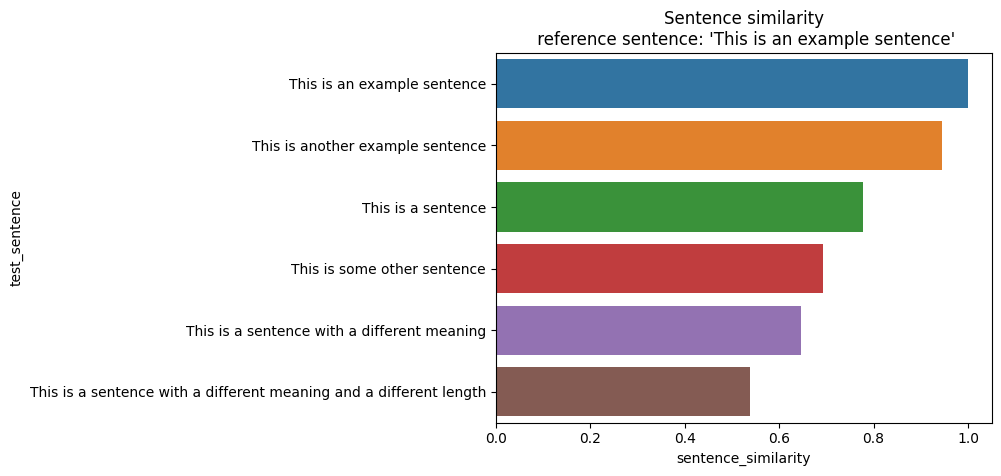

In [6]:
_ = sns.barplot(
    data=ss_df,
    x="sentence_similarity",
    y="test_sentence",
    order=ss_df.sort_values("sentence_similarity", ascending=False).test_sentence,
)
_ = plt.title(f"Sentence similarity\n reference sentence: '{reference_sentence}'")